In [1]:
# hide warnings
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [2]:
#loading the MNIST dataset
from sklearn.datasets import load_digits
mnist = load_digits()

In [3]:
# features in data
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [20]:
#spliting the dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.25, random_state=42)

<Figure size 432x288 with 0 Axes>

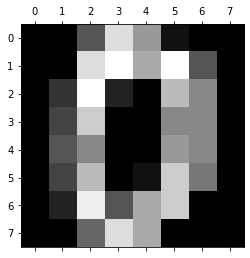

In [22]:
# visualising data - first row represents 0
plt.gray()
plt.matshow(mnist.images[0])
plt.show()

In [25]:
# the shape of training data
X_train.shape

(1347, 64)

### SVM

In [26]:
# building a SVM model
from sklearn.svm import SVC
model = SVC()

In [27]:
#creating a GridSearchCV object with an SVM model as the estimator
from sklearn.model_selection import GridSearchCV
params = {'C': [1, 10, 100], 'gamma': [0.1, 0.01, 0.001]}
grid_search = GridSearchCV(model, params)

In [28]:
#using the fit method to train the model 
grid_search.fit(X_train, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 10, 100], 'gamma': [0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [29]:
print("The best score across ALL searched params:\n",grid_search.best_score_)

The best score across ALL searched params:
 0.985894580549369


In [30]:
# the best estimator
print("The best estimator across ALL searched params:\n",grid_search.best_estimator_)

The best estimator across ALL searched params:
 SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [31]:
# the best combination of hyperparameters 
print("The best parameters across ALL searched params:\n",grid_search.best_params_)

The best parameters across ALL searched params:
 {'C': 1, 'gamma': 0.001}


In [32]:
#evaluating the model on the test set
print(grid_search.score(X_test, y_test))

0.9888888888888889


In [35]:
### loading into digits

#### Testing on real time data

In [33]:
from sklearn.svm import SVC
model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [44]:
image = cv2.imread('test_image.jpg')
grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(grey.copy(), 75, 255, cv2.THRESH_BINARY_INV)
contours, a = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)



 ----------------Image--------------------


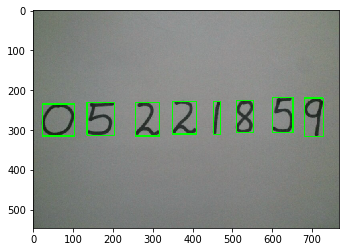

In [47]:
preprocessed_digits = []

for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    
    # Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours)
    cv2.rectangle(image, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=2)
    
    # Cropping out the digit from the image corresponding to the current contours in the for loop
    digit = thresh[y:y+h, x:x+w]
    
    # Resizing that digit to (8, 8)
    resized_digit = cv2.resize(digit, (8,8))

    
    # Adding the preprocessed digit to the list of preprocessed digits
    preprocessed_digits.append(resized_digit)

print("\n ----------------Image--------------------")
plt.imshow(image, cmap="gray")
plt.show()
    
inp = np.array(preprocessed_digits)


(8, 8)

---------PREDICTION----------



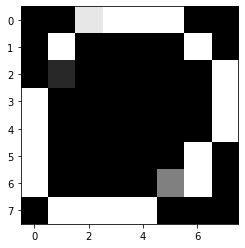

(8, 8)

---------PREDICTION----------



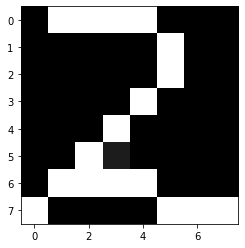

(8, 8)

---------PREDICTION----------



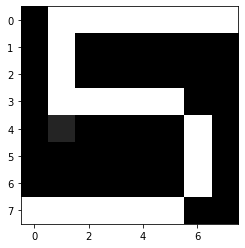

(8, 8)

---------PREDICTION----------



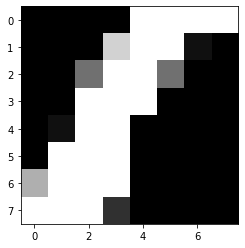

(8, 8)

---------PREDICTION----------



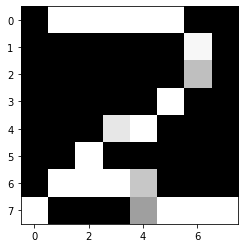

(8, 8)

---------PREDICTION----------



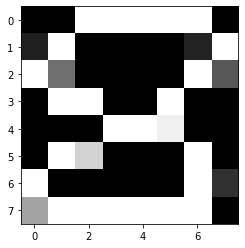

(8, 8)

---------PREDICTION----------



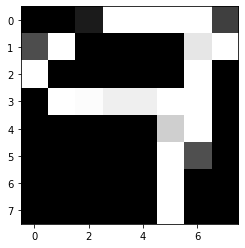

(8, 8)

---------PREDICTION----------



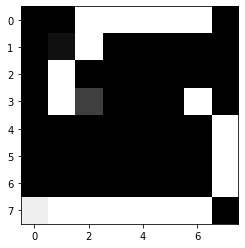

In [49]:
for digit in preprocessed_digits:
#     print(digit.shape)
    digit = digit/255
    digit = digit.reshape(1,64)
    prediction = model_linear.predict(digit)   
    
    print ("\n---------PREDICTION----------\n")
    plt.imshow(digit.reshape(8,8), cmap="gray")
    plt.show()

### Logistic Regression

In [51]:
# importing necessary libraries
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [52]:
# Loading the MNIST dataset
X1, y1 = fetch_openml('mnist_784', version=1, return_X_y=True)

In [53]:
X1[23].shape

(784,)

In [54]:
# Spliting the data into training and test sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

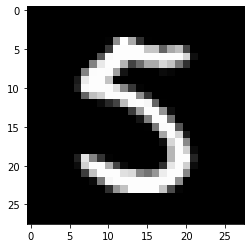

In [55]:
# visualising 23rd row and it is the number 5
plt.imshow(X1_train[23].reshape(28,28))

In [56]:
# Creating a logistic regression model
lr = LogisticRegression()

In [ ]:
# Using cross-validation to evaluate the model on the training data
scores = cross_val_score(lr, X1_train, y1_train, cv=5)

In [ ]:
# Printing the mean accuracy of the model on the training data
print(scores.mean())

In [15]:
# Fitting the model on the training data
lr.fit(X1_train, y1_train)

/Users/ritikaradhakrishnan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
# Using the model to make predictions on the test data
y1_pred = lr.predict(X1_test)

In [17]:
# Printing the accuracy of the model on the test data
print(lr.score(X1_test, y1_test))

0.9196666666666666
